## 実験概要
DC-SGDにおける次元数について変化させながら分割数ごとの過剰期待損失、そのステップごとの推移を確認する。

- ノイズの種類
    - 正規分布
        - 平均0
        - 分散
            - 2.2

    - 対数正規分布
        - 平均0
        - 分散
            - 1.75

- 次元数
    - 128
    - 256
    - 512
    - 1024

- n
    - 2500

トライアルの回数は100,ただし損失の推移についてはそのうちの一回を使用

## 結果


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

from ML2_lib import DC_SGD
from ML2_lib import loss
from ML2_lib import plot_set

In [2]:
X_mean = 5
X_var = 2
son = loss.LinearQuadraticLoss()
columns=['1', '2', '4','5','10','20']
k_list = [0,1,3,4,9,19]
n = 2500
c = 1
noise = "normal"


  0%|          | 0/100 [00:00<?, ?it/s]

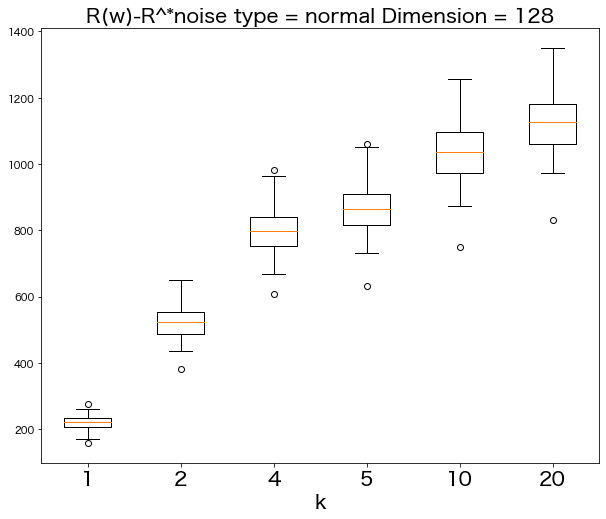

In [3]:
E_var = 1.75

w_star = np.arange(128)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [4]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,219.752006,522.154825,799.545568,865.282948,1036.753991,1125.601775
std,20.830458,48.858841,67.580140,73.687542,86.818722,90.790500
min,158.433928,381.255082,608.606834,630.956242,750.739051,829.790667
25%,207.166399,487.784769,752.485284,816.199058,973.513519,1060.068148
50%,221.556771,523.738174,796.579307,864.281204,1035.563747,1127.418702
75%,233.277374,554.712189,841.131425,910.912188,1096.310812,1179.649690
max,275.037384,650.370003,981.943925,1059.426033,1255.705468,1350.879574


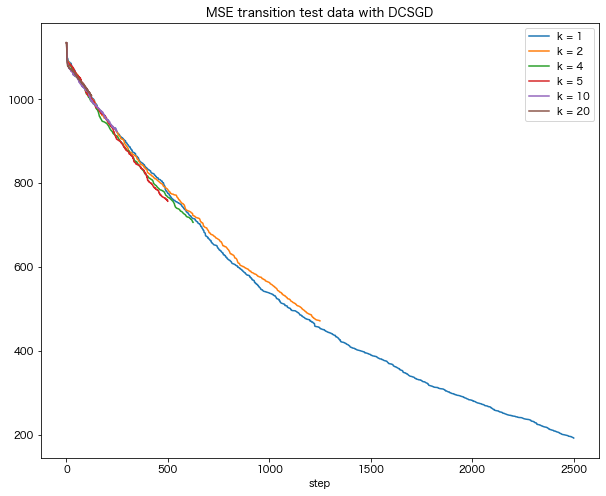

In [5]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

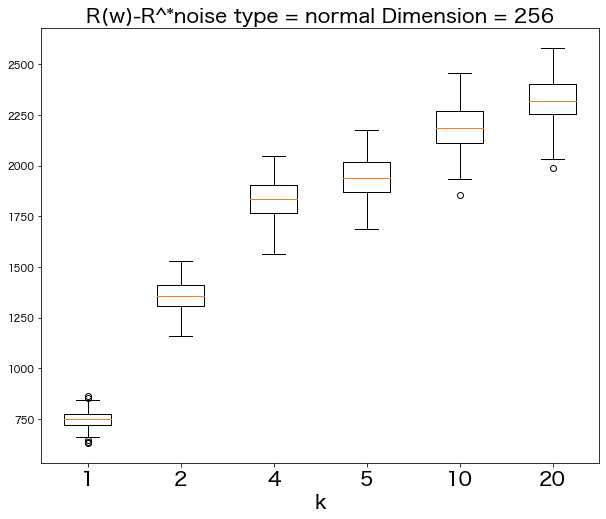

In [6]:

E_var = 1.75

w_star = np.arange(256)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [7]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,748.495823,1353.638553,1830.526972,1940.329940,2189.412267,2322.804355
std,44.865954,73.721622,101.310383,105.571882,122.197271,123.919034
min,631.424074,1159.971146,1561.345392,1686.327102,1856.950334,1985.887828
25%,722.821722,1308.066706,1764.582091,1871.365723,2112.516290,2252.692133
50%,752.306666,1356.596052,1833.938382,1936.292182,2183.528432,2317.143095
75%,772.374897,1410.656887,1902.204468,2015.496800,2269.535615,2400.114452
max,865.088143,1528.102101,2047.202269,2174.641007,2454.543724,2581.310288


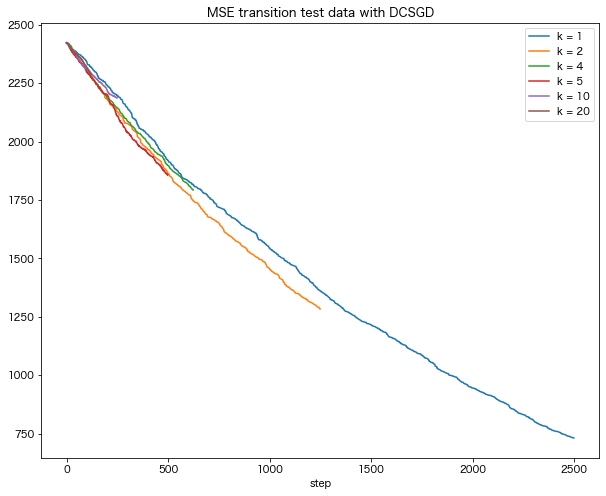

In [8]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)


  0%|          | 0/100 [00:00<?, ?it/s]

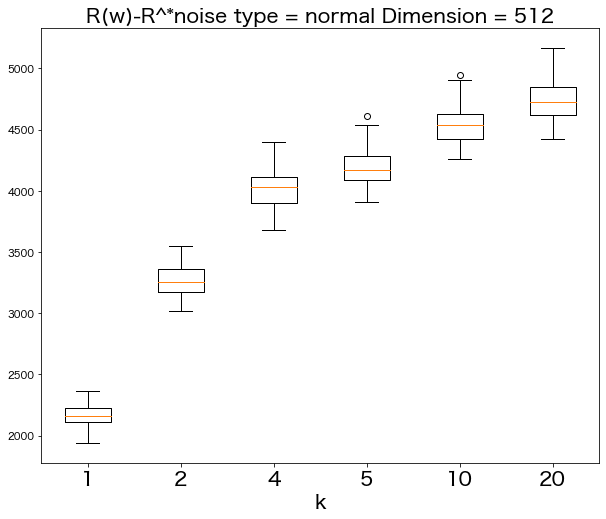

In [9]:

E_var = 1.75

w_star = np.arange(512)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [10]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2166.798363,3272.783942,4018.591579,4184.425666,4540.492988,4737.427171
std,85.235182,124.185262,147.283876,142.820062,152.920805,157.249717
min,1938.933326,3020.833175,3675.990328,3910.536250,4258.584703,4426.984519
25%,2106.766706,3172.596264,3901.627209,4091.374400,4423.415102,4621.860456
50%,2162.768838,3257.542281,4031.019524,4172.768319,4540.374542,4722.611207
75%,2227.737415,3359.394561,4110.710446,4284.022160,4626.268058,4851.210732
max,2362.665248,3545.097897,4395.931022,4608.357538,4946.149872,5169.524108


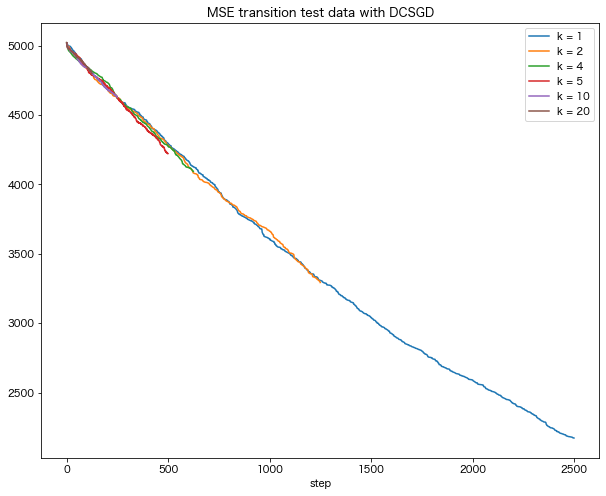

In [11]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

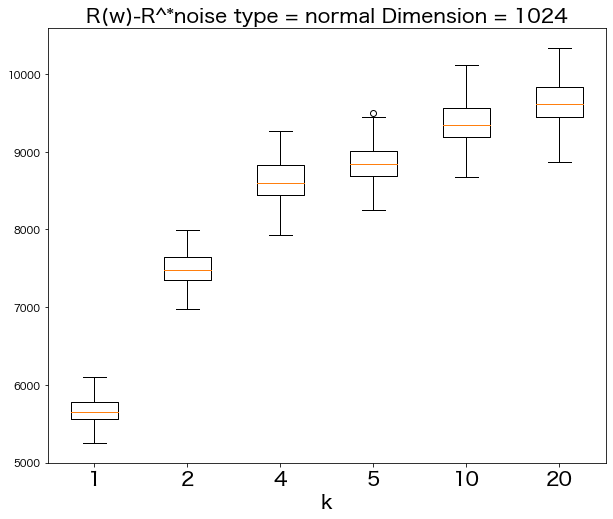

In [12]:

E_var = 1.75

w_star = np.arange(1024)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [13]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5664.508308,7488.595253,8614.756119,8858.767099,9374.307173,9635.648532
std,183.907769,225.581427,272.512799,253.431052,280.922745,287.607786
min,5251.869823,6975.146854,7933.080570,8252.131268,8675.109646,8873.479179
25%,5557.676619,7346.061333,8441.743008,8693.380787,9194.346399,9447.773103
50%,5650.141661,7475.283730,8600.570396,8839.020155,9350.351433,9620.327461
75%,5777.480300,7643.698485,8826.363013,9013.888377,9568.085226,9833.960485
max,6101.898605,7992.187962,9266.173767,9495.262779,10115.362518,10339.066013


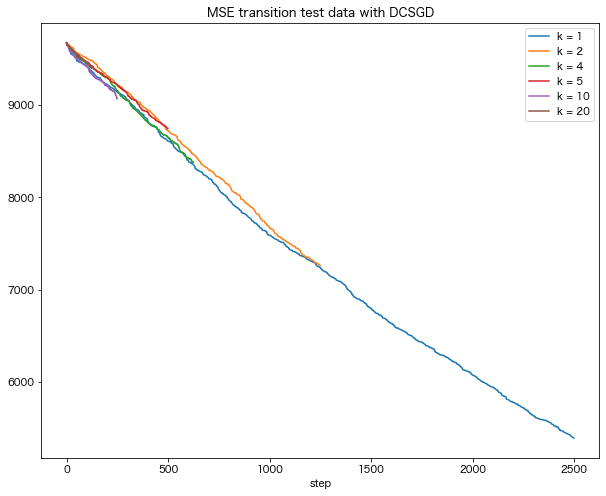

  0%|          | 0/100 [00:00<?, ?it/s]

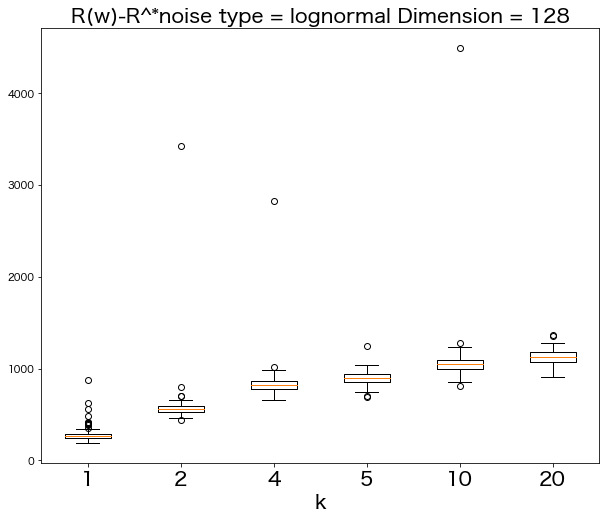

In [14]:
#lognormal noise

noise = "lognormal"
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

E_var = 1.75

w_star = np.arange(128)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [15]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,286.516589,587.700245,838.194206,893.588866,1074.657206,1126.590119
std,89.116625,292.027603,213.466822,78.789060,355.064878,89.634442
min,189.659550,441.231492,661.937284,692.431144,813.376766,905.265063
25%,246.170101,530.594676,781.648862,849.654675,996.621468,1068.459451
50%,264.481425,556.134364,819.847948,893.321919,1044.033822,1120.680574
75%,287.079564,588.311485,863.787410,946.034129,1095.934102,1181.729919
max,874.418646,3426.056397,2827.041905,1249.187696,4490.448292,1364.275976


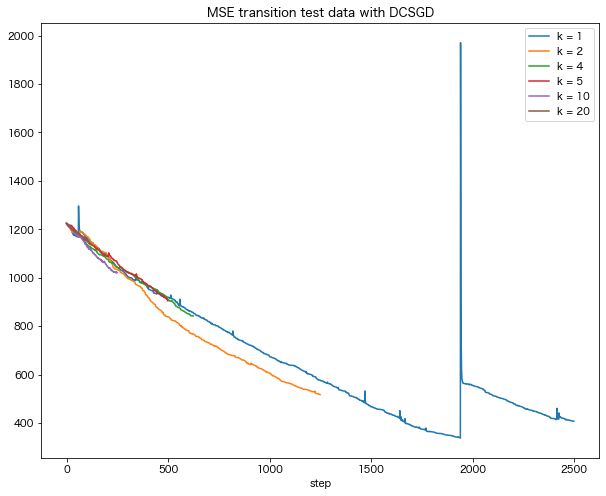

In [16]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

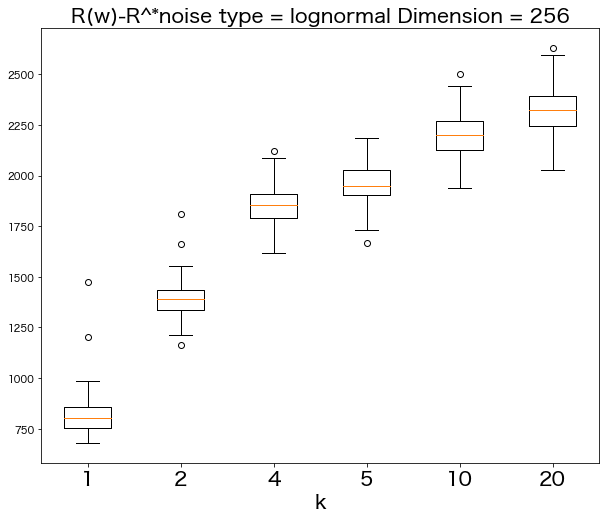

In [17]:

E_var = 1.75

w_star = np.arange(256)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [18]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,818.554304,1392.181705,1853.385272,1959.121112,2200.064489,2325.294737
std,105.234274,95.012989,93.016802,94.858895,108.389516,114.646899
min,679.585155,1162.492886,1618.424032,1665.576026,1938.070526,2029.172521
25%,755.967888,1334.001278,1792.156448,1901.985515,2125.548628,2245.705287
50%,801.665956,1389.313691,1855.831595,1950.583709,2202.188700,2322.458379
75%,859.920560,1435.634330,1910.491295,2026.569492,2271.550499,2391.909339
max,1475.611019,1812.047443,2120.395696,2183.327594,2502.670619,2631.290052


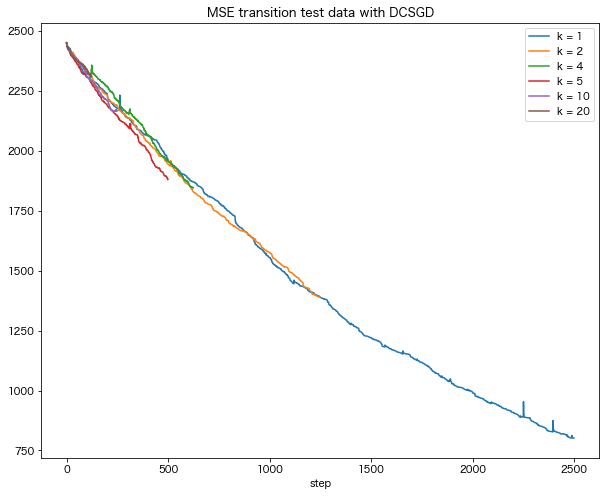

In [19]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)


  0%|          | 0/100 [00:00<?, ?it/s]

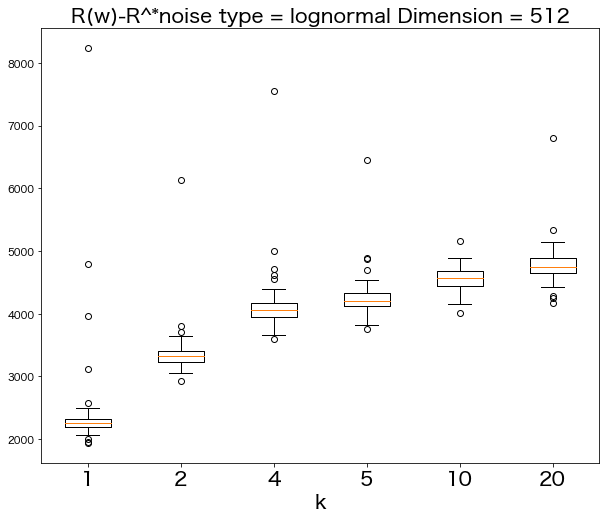

In [20]:

E_var = 1.75

w_star = np.arange(512)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [21]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2360.454693,3353.693750,4099.209341,4251.222416,4562.644168,4768.922594
std,681.999382,316.907394,409.198198,292.193777,169.579064,277.453331
min,1937.698797,2919.273340,3596.646362,3750.959207,4015.612481,4167.881845
25%,2191.321838,3236.323444,3952.678254,4118.078272,4443.455742,4650.943846
50%,2264.670114,3321.807503,4057.523561,4203.295869,4565.518896,4750.430321
75%,2317.808508,3405.229025,4176.194100,4331.403238,4673.953437,4885.514053
max,8243.512147,6133.743806,7557.869457,6459.820941,5166.917487,6795.931791


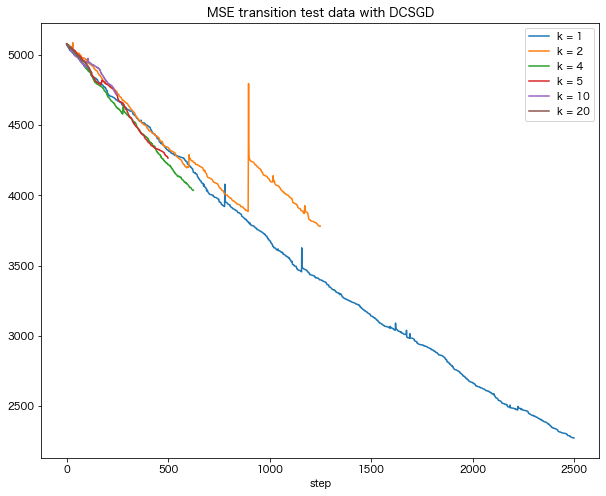

In [22]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

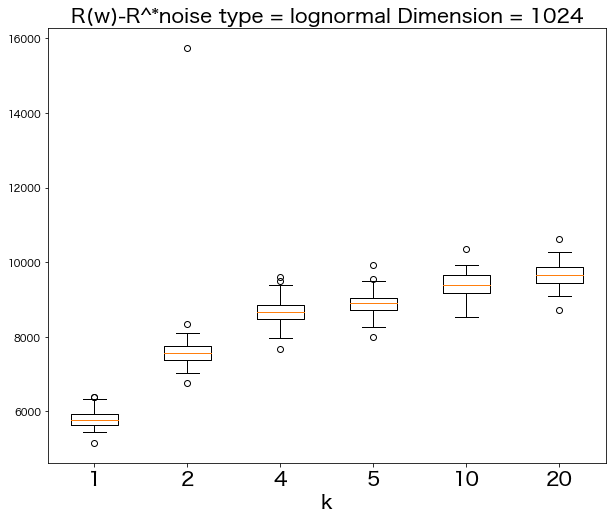

In [23]:

E_var = 1.75

w_star = np.arange(1024)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [24]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5794.254420,7635.780738,8671.312154,8901.676143,9402.211517,9652.586483
std,221.674488,861.989556,311.184965,300.009094,301.845092,310.810802
min,5151.970055,6757.804089,7680.465916,7994.069225,8537.645302,8727.874481
25%,5645.096562,7388.375857,8477.553520,8717.251675,9174.012156,9450.946093
50%,5764.712324,7561.295275,8666.691158,8902.829336,9376.928631,9645.076796
75%,5933.786162,7750.041958,8849.278388,9042.907791,9644.524885,9874.219218
max,6398.667492,15753.503979,9614.380192,9916.883175,10353.540565,10635.832607


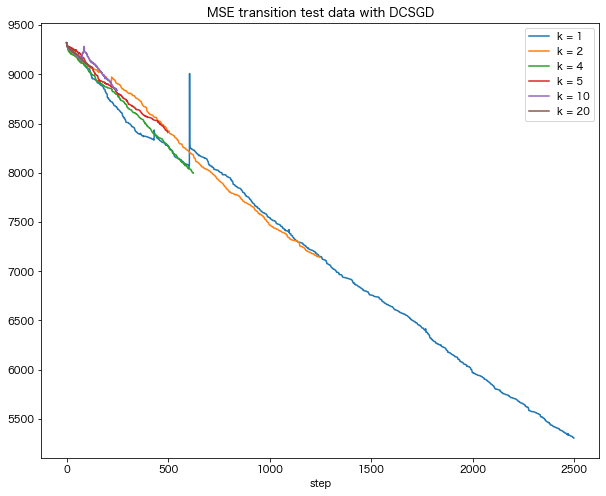

In [25]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)